In [156]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Newton's Method Optimization
### Single Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐−𝟏𝟓𝒙+𝟏$,        
- Draw the functions and check out the minimum.
- Draw the 1st derivative of the function and check out the root.
- Draw 2nd derivative of the function and check out the sign at the minimum.
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function should return the solution and the gradient.

In [58]:
f=lambda x: x**2-15*x+1  
df=lambda x: 2*x-15
df2=lambda x: 2
x0 = 0.0

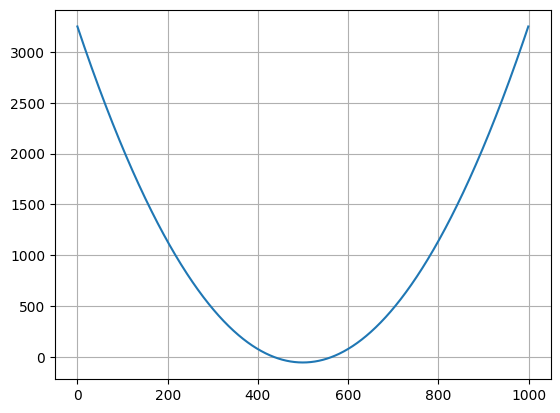

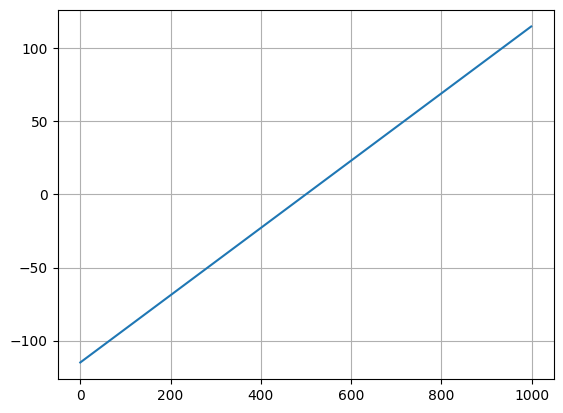

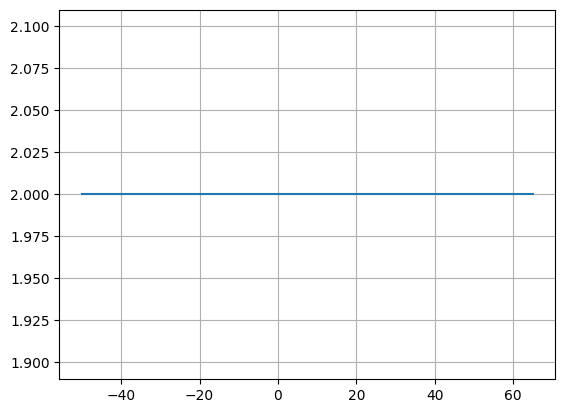

In [43]:
plt.plot(f(np.linspace(-50,65,1000)))
plt.grid()
plt.show()
plt.plot(df(np.linspace(-50,65,1000)))
plt.grid()
plt.show()
plt.plot((np.linspace(-50,65,1000)),[df2(i) for i in range(1000) ])
plt.grid()
plt.show()

In [59]:

def gradient_descent(df, x0, lr=0.1, epsilon=0.1, max_iterations=100):
    x = x0
    
    for  i in  range(max_iterations):
        grad = df(x)
        if abs(grad) < epsilon:
            break
        
        x = x - lr * grad
        
    
    return x,grad,i



In [62]:

def newtons(f, df, df2, x0, eps=0.1, max_iterations=100,lr=1):
    x = x0
    for i in range (max_iterations):
        grad = df(x)
        if abs(grad) < eps:
            break
        
        hessian_inverse = 1 / df2(x)
        x = x - hessian_inverse * grad*lr
    
    return x, grad,i


In [60]:
x_min,gradient,iterations = gradient_descent(df, 40,0.01,epsilon = 0.1,max_iterations=1000)
print("GD Results with x0 =40, lr=0.01, epsilon=0.1")
print(f"Found solution after {iterations} iterations.")
print("x_min:", x_min)
print("Gradient =:", gradient)


GD Results with x0 =40, lr=0.01, epsilon=0.1
Found solution after 321 iterations.
x_min: 7.549596800192111
Gradient =: 0.09919360038422198


In [63]:
res=newtons(f, df, df2, 40, eps=0.1, max_iterations=1000)
print("Newton Results with x0 =40, epsilon=0.1")
print(f"Found solution after {res[2]} iterations.")
print("x_min:", res[0])
print("Gradient =:", res[1])


Newton Results with x0 =40, epsilon=0.1
Found solution after 1 iterations.
x_min: 7.5
Gradient =: 0.0


### Multi Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$


##### The function shgould return the solution and the gradient.

In [50]:
from sympy import *
from sympy.plotting import plot3d
import matplotlib.pyplot as plt

$𝒇(𝒙)=𝒙^𝟐+y^2$

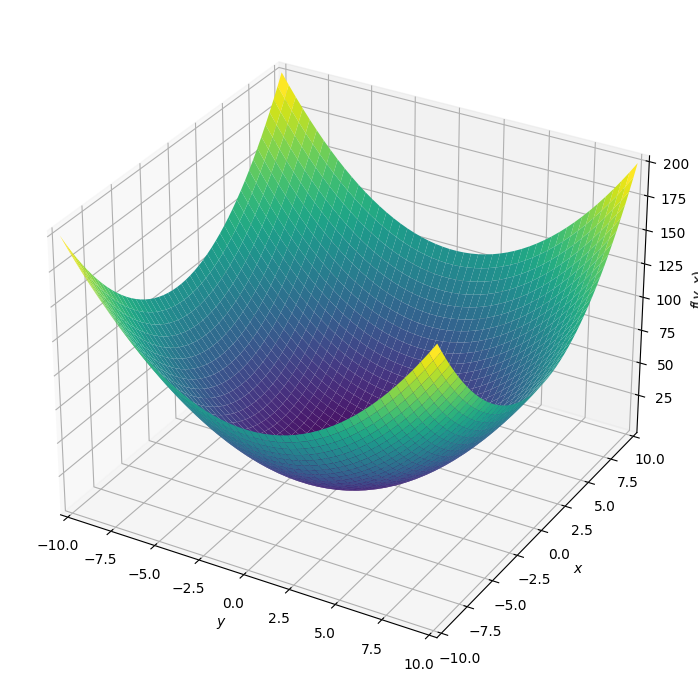

In [25]:
x,y = symbols('x y')
f = x**2 + y**2
plot3d(f,size=(10,7))
plt.show()

In [51]:

f = lambda x: x[0]**2 + x[1]**2
df = lambda x: np.array([2*x[0], 2*x[1]])
df2 = lambda x: np.array([[2, 0], [0, 2]])

def gradient_descent_muilti(df, x0, alpha=0.1, max_iterations=100, eps=0.001):
    x = np.array(x0)
    iterations = 0
    
    for  i in range( max_iterations):
        grad = df(x)
        
        if np.linalg.norm(grad) < eps:
            break
        
        x = x - alpha * grad
        
    
    return x, grad, i





In [85]:

def newtons_muilti(df, df2, x0, eps=0.001, max_iterations=100,lr=1):
    x = np.array(x0)
    for  iterations in range( max_iterations):
        gradient = df(x)
        
        if np.linalg.norm(gradient) < eps:
            break
        
        hessian_inverse = np.linalg.inv(df2(x))
        x = x - hessian_inverse.dot(gradient*lr)
            
    return x, gradient, iterations






In [52]:
x0 = np.array([10.0, 10.0])

xy, gradient, itr = gradient_descent_muilti(df, x0)
print("Found solution after 46 iterations.:", itr)
print("xy=:\n", xy)
print("gradient\n", gradient)

Found solution after 46 iterations.: 46
xy=:
 [0.00034845 0.00034845]
gradient
 [0.0006969 0.0006969]


In [86]:
# Multi-variable Gradient descent with learning rate = 0.5,

xy, gradient, itr = gradient_descent_muilti(df, x0,alpha=0.5)
print("Found solution after 46 iterations.:", itr)
print("xy=:\n", xy)
print("gradient\n", gradient)



Found solution after 46 iterations.: 1
xy=:
 [0. 0.]
gradient
 [0. 0.]


In [89]:
# Multi-variable Newton's method without learning rate, 

X, grad, num_iterations = newtons_muilti(df, df2, x0)
print("Newtons Method:")
print(f"Found solution after {num_iterations} iterations.:")
print("xy_min", X)
print("Gradient =", grad)

Newtons Method:
Found solution after 1 iterations.:
xy_min [0. 0.]
Gradient = [0. 0.]


In [90]:
# Multi-variable Newton's method with learning rate = 0.5, 

X, grad, num_iterations = newtons_muilti(df, df2, x0,lr=0.5)
print("Newtons Method:")
print(f"Found solution after {num_iterations} iterations.:")
print("xy_min", X)
print("Gradient =", grad)

Newtons Method:
Found solution after 15 iterations.:
xy_min [0.00030518 0.00030518]
Gradient = [0.00061035 0.00061035]


## BFGS
- Implement the <b>BFGS</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
- The stop condition is grad < epsilon.


In [203]:
def bfgs(f, df, xn_1, xn, epsilon=0.001, max_iter=100, learning_rate=1.0):
    B_inv = np.eye(len(xn))    
    for iteration in range(max_iter):
        grad = df(xn)
        Dfxn_1 = df(xn_1)
        Dfxn = df(xn)
        Deltax = xn - xn_1

        print(f"****************** Iteration {iteration+1} ********************\n")
        print("xn_1:\n", xn_1)
        print("xn:\n", xn)
        print("Dfxn_1\n", Dfxn_1)
        print("Dfxn\n", Dfxn)
        print(f"  Norm of Gradient =\n {np.linalg.norm(grad)}")
        if np.linalg.norm(grad) < epsilon:
            print(f"**************************************\n")
            print(f"Found solution after {iteration+1} iterations.")
            print(f"xy_min =\n {xn}")
            print(f"Gradient =\n {grad}")
            break
        xn_1 = xn  
        y = Dfxn - Dfxn_1
        I=(np.eye(len(xn)))
        B_inv = (( I- ((Deltax @ y.T)/(y.T @ Deltax))) @ B_inv @  (I - (y @ Deltax.T/(y.T @ Deltax)))) + ((Deltax @ Deltax.T) / (y.T @ Deltax))
        
        xn = xn-learning_rate*(B_inv @ grad)



In [204]:
f = lambda x: x[0]**2 + x[1]**2
df = lambda x: np.array([2*x[0], 2*x[1]])

x0 = np.array([10., 10.]).reshape(-1, 1)
x1 = np.array([9., 9.]).reshape(-1, 1)

result = bfgs(f, df, x0, x1, epsilon=0.001, learning_rate=1.0)

****************** Iteration 1 ********************

xn_1:
 [[10.]
 [10.]]
xn:
 [[9.]
 [9.]]
Dfxn_1
 [[20.]
 [20.]]
Dfxn
 [[18.]
 [18.]]
  Norm of Gradient =
 25.45584412271571
****************** Iteration 2 ********************

xn_1:
 [[9.]
 [9.]]
xn:
 [[0.]
 [0.]]
Dfxn_1
 [[18.]
 [18.]]
Dfxn
 [[0.]
 [0.]]
  Norm of Gradient =
 0.0
**************************************

Found solution after 2 iterations.
xy_min =
 [[0.]
 [0.]]
Gradient =
 [[0.]
 [0.]]


In [205]:
bfgs(f, df, x0, x1, epsilon=0.001, learning_rate=0.9)
#with learning rate =0.9


****************** Iteration 1 ********************

xn_1:
 [[10.]
 [10.]]
xn:
 [[9.]
 [9.]]
Dfxn_1
 [[20.]
 [20.]]
Dfxn
 [[18.]
 [18.]]
  Norm of Gradient =
 25.45584412271571
****************** Iteration 2 ********************

xn_1:
 [[9.]
 [9.]]
xn:
 [[0.9]
 [0.9]]
Dfxn_1
 [[18.]
 [18.]]
Dfxn
 [[1.8]
 [1.8]]
  Norm of Gradient =
 2.545584412271572
****************** Iteration 3 ********************

xn_1:
 [[0.9]
 [0.9]]
xn:
 [[0.09]
 [0.09]]
Dfxn_1
 [[1.8]
 [1.8]]
Dfxn
 [[0.18]
 [0.18]]
  Norm of Gradient =
 0.25455844122715704
****************** Iteration 4 ********************

xn_1:
 [[0.09]
 [0.09]]
xn:
 [[0.009]
 [0.009]]
Dfxn_1
 [[0.18]
 [0.18]]
Dfxn
 [[0.018]
 [0.018]]
  Norm of Gradient =
 0.025455844122715694
****************** Iteration 5 ********************

xn_1:
 [[0.009]
 [0.009]]
xn:
 [[0.0009]
 [0.0009]]
Dfxn_1
 [[0.018]
 [0.018]]
Dfxn
 [[0.0018]
 [0.0018]]
  Norm of Gradient =
 0.0025455844122715702
****************** Iteration 6 ********************

xn_1:
 [[0.